# imported libraries

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,KFold

# load data

In [248]:
df=pd.read_csv(r'C:\Users\Naveen\Downloads\DS3_C6_S2_Classification_BankChurn_Data_Project.csv')

In [249]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# feature engeering

In [250]:
df.shape

(10000, 13)

In [251]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [252]:
d=df['Surname'].unique()

In [253]:
for i in d:
    print(i)

Hargrave
Hill
Onio
Boni
Mitchell
Chu
Bartlett
Obinna
He
H?
Bearce
Andrews
Kay
Chin
Scott
Goforth
Romeo
Henderson
Muldrow
Hao
McDonald
Dellucci
Gerasimov
Mosman
Yen
Maclean
Young
Nebechi
McWilliams
Lucciano
Azikiwe
Odinakachukwu
Sanderson
Maggard
Clements
Lombardo
Watson
Lorenzo
Armstrong
Cameron
Hsiao
Clarke
Osborne
Lavine
Bianchi
Tyler
Martin
Okagbue
Yin
Buccho
Chidiebele
Trevisani
O'Brien
Parkhill
Yoo
Phillipps
Tsao
Endrizzi
T'ien
Velazquez
Hunter
Clark
Jeffrey
Pirozzi
Jackson
Hammond
Brownless
Chibugo
Glauert
Pisano
Konovalova
McKee
Palermo
Ballard
Wallace
Cavenagh
Hu
Read
Bushell
Postle
Buley
Leonard
Mills
Onyeorulu
Beit
Ndukaku
Gant
Rowley
Sharpe
Heap
Ritchie
Cole
Capon
Fiorentini
Graham
Yuille
Allard
Fanucci
Fu
Hung
Bradley
Dunbabin
Mauldon
Stiger
Parsons
Walkom
T'ang
Eremenko
Rowntree
Thorpe
Chiemela
Ko
Welch
Duncan
Chidozie
Wu
Culbreth
Kennedy
Calabresi
Zetticci
Fuller
MacDonald
Piccio
Fernie
Kaodilinakachukwu
Cocci
Alekseeva
Chinweike
Arthur
Li
Ma
Chia
Vasin
Groves
Tien
Forwoo

In [254]:
# We don't need to keep this name columns for our analysis so we can drop it

In [255]:
df.drop(columns='CustomerId',inplace=True)

In [256]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [257]:
e=df['CreditScore'].unique()
for i in e:
    print(i)

619
608
502
699
850
645
822
376
501
684
528
497
476
549
635
616
653
587
726
732
636
510
669
846
577
756
571
574
411
591
533
553
520
722
475
490
804
582
472
465
556
834
660
776
829
637
550
698
585
788
655
601
656
725
511
614
742
687
555
603
751
581
735
661
675
738
813
657
604
519
664
678
757
416
665
777
543
506
493
652
750
729
646
647
808
524
769
730
515
773
814
710
413
623
670
622
785
605
479
685
538
562
721
628
668
828
674
625
432
770
758
795
686
789
589
461
584
579
663
682
793
691
485
650
754
535
716
539
706
586
631
717
800
683
704
615
667
484
480
578
512
606
597
778
514
525
715
580
807
521
759
516
711
618
643
671
689
620
676
572
695
592
567
694
547
594
673
610
767
763
712
703
662
659
523
772
545
634
739
771
681
544
696
766
727
693
557
531
498
651
791
733
811
707
714
782
775
799
602
744
588
747
583
627
731
629
438
642
806
474
559
429
680
749
734
644
626
649
805
718
840
630
654
762
568
613
522
737
648
443
640
540
460
593
801
611
802
745
483
690
492
709
705
560
752
701
537
487
596
702


In [258]:
df['Geography'].unique()

array(['France', 'Spain', 'espanio', 'fra', 'Germany', 'france', 'ger',
       'spain', 'germany', 'gernamy', 'GERMANY'], dtype=object)

In [259]:
df['Geography'].replace(to_replace=['Germany','ger','germany','gernamy','GERMANY'],value='germany',inplace=True)

In [260]:
df['Geography'].unique()

array(['France', 'Spain', 'espanio', 'fra', 'germany', 'france', 'spain'],
      dtype=object)

In [261]:
df['Geography'].replace(to_replace=['Spain'],value='spain',inplace=True)

In [262]:
df['Geography'].replace(to_replace=['France','fra'],value='france',inplace=True)

In [263]:
df['Geography'].replace(to_replace='espanio',value='spain',inplace=True)

In [264]:
df['Geography'].unique()

array(['france', 'spain', 'germany'], dtype=object)

### now we have only three country according to our requirement

In [265]:
df['CreditScore'].isnull().sum()      # to check credit score column

0

In [266]:
df['Gender'].value_counts()      # we have counting of male is high than female

Male      5457
Female    4543
Name: Gender, dtype: int64

In [267]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [268]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

In [269]:
df['Age'].isnull().sum()

0

In [270]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [271]:
df['Balance'].unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

In [272]:
df['Balance'].isnull().sum()

0

In [273]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [274]:
df['NumOfProducts'].replace(to_replace='NumOfProducts',value='num_of _products',inplace=True)

In [275]:
df['HasCrCard'].unique()

array([1, 0], dtype=int64)

In [276]:
df['IsActiveMember'].unique()

array([1, 0], dtype=int64)

In [277]:
df['EstimatedSalary'].unique()

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [278]:
df['EstimatedSalary'].isnull().sum()

0

In [279]:
df['Exited'].unique()

array([1, 0], dtype=int64)

In [280]:
df['Exited'].isnull().sum()

0

In [281]:
df.drop(columns='Surname',inplace=True)    # i have dropped this column because their is no need if we have to keep so we can

In [282]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [283]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# exploratory data analysis

## here i use visualise to check the data

# ****************univariate analysis***********

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

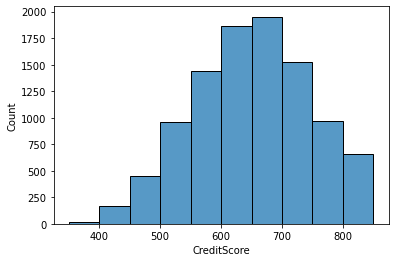

In [285]:
sb.histplot(data=df,x='CreditScore',bins=10)

### credit score is high between range 650 to 700 and after that 600 to 650

<AxesSubplot:xlabel='Geography', ylabel='count'>

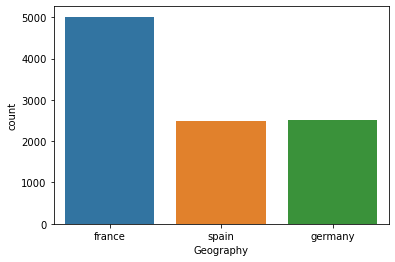

In [286]:
sb.countplot(data=df,x='Geography')

### number of people are high in france country

<AxesSubplot:xlabel='Gender', ylabel='count'>

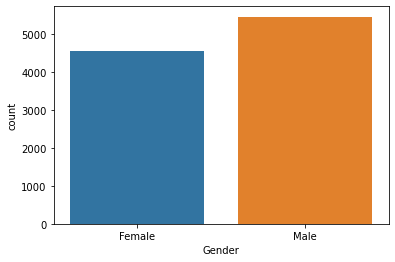

In [287]:
sb.countplot(data=df,x='Gender')

### males are high than the females

<AxesSubplot:xlabel='Age', ylabel='Count'>

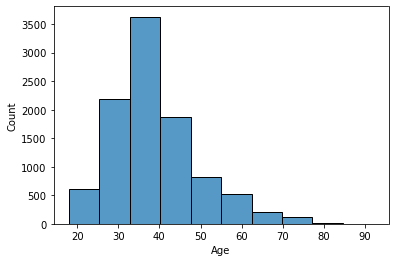

In [288]:
sb.histplot(data=df,x='Age',bins=10)

### count of customers are high in age between 33 to 41

<AxesSubplot:xlabel='Tenure', ylabel='count'>

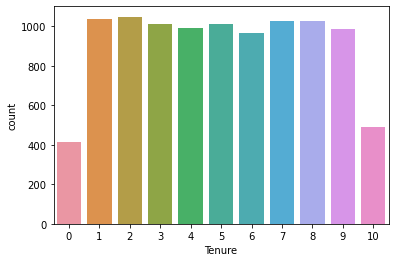

In [289]:
sb.countplot(data=df,x='Tenure')

### in 2nd column the count of customer is high but we can't conclude with it

<AxesSubplot:xlabel='Balance', ylabel='Count'>

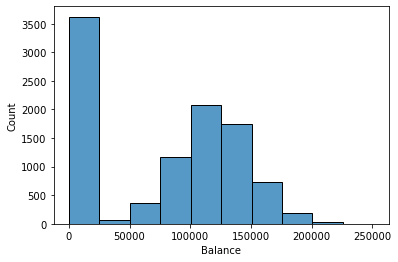

In [290]:
sb.histplot(data=df,x='Balance',bins=10)

### number of customers are high who are having  bank balance between 0 to 25000

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

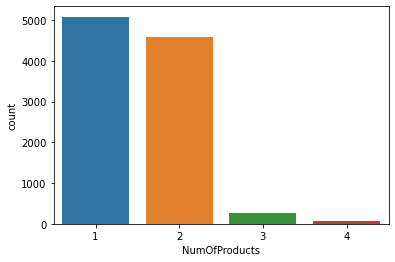

In [291]:
sb.countplot(data=df,x='NumOfProducts')

### customers are high who has number of product equal to 1 and after that number of product 2 also we can see there are few customers who has number of products more than two

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

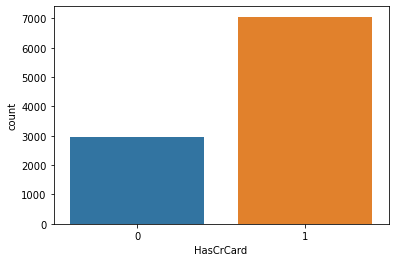

In [292]:
sb.countplot(data=df,x='HasCrCard')

### most of the people have their own card

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

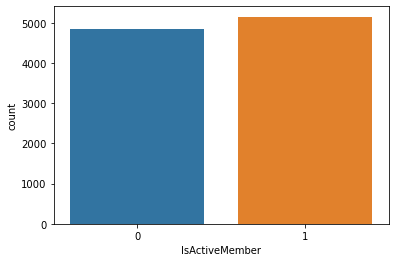

In [293]:
sb.countplot(data=df,x='IsActiveMember')

### active customers are more than non active but not much more

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

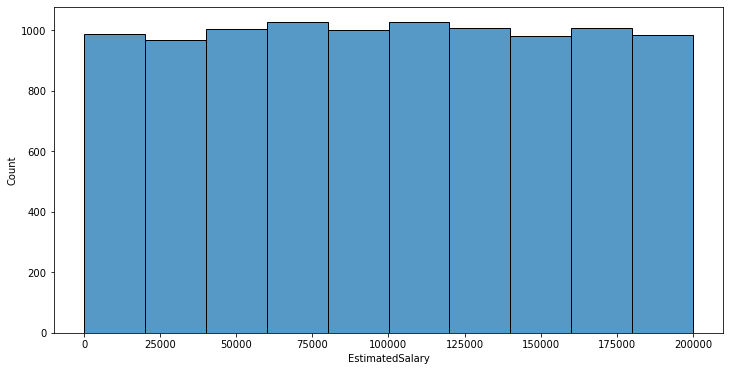

In [294]:
pt.figure(figsize=(12,6))
sb.histplot(data=df,x='EstimatedSalary',bins=10)

<AxesSubplot:xlabel='Exited', ylabel='count'>

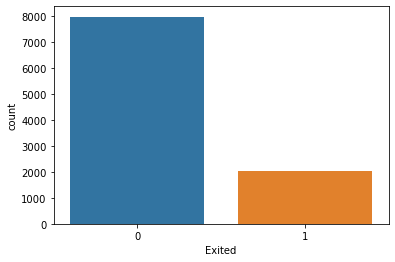

In [295]:
sb.countplot(data=df,x='Exited')

### the number of customers not churned out is more than the churned out

# ****************bivariate analysis***********************

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

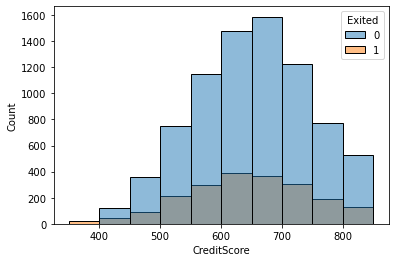

In [296]:
sb.histplot(data=df,x='CreditScore',hue='Exited',bins=10)

### here the range between 400 to 450 credit score have higher number of churned out customers
### and then whose credit score is less than 400
### after that whose credit score is between 600 to 650

<AxesSubplot:xlabel='Geography', ylabel='count'>

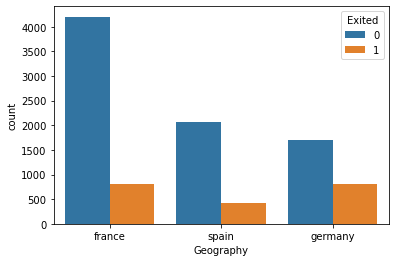

In [297]:
sb.countplot(data=df,x='Geography',hue='Exited')

## in germany country the count of customers has churned out is more than the other country

<AxesSubplot:xlabel='Gender', ylabel='count'>

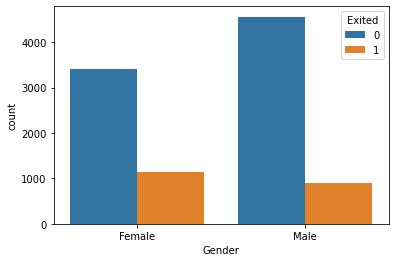

In [298]:
sb.countplot(data=df,x='Gender',hue='Exited')

### females are mostly churned out according to the males the ratio is like (60:40)

<AxesSubplot:xlabel='Age', ylabel='Count'>

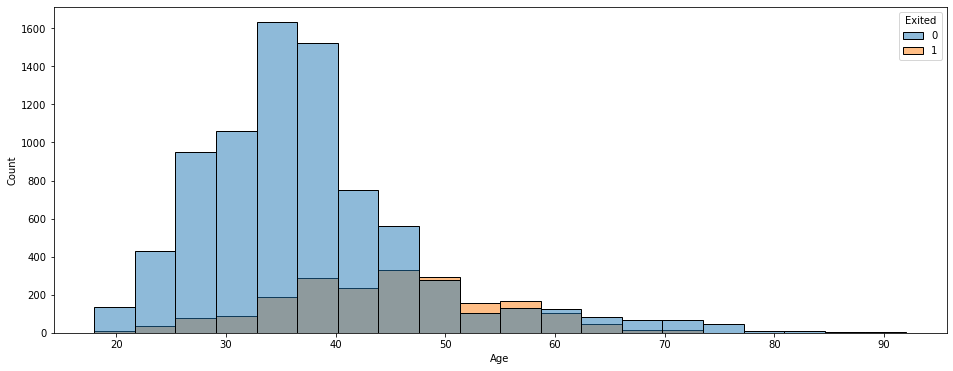

In [299]:
pt.figure(figsize=(16,6))
sb.histplot(data=df,x='Age',hue='Exited',bins=20)

### churned out peoples are high in age between 47 to 51 and than in age between 59 to 62 approx

<AxesSubplot:xlabel='Tenure', ylabel='count'>

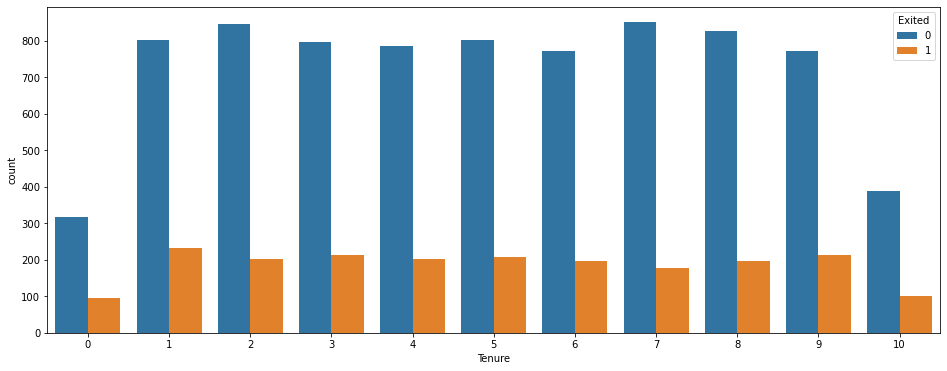

In [300]:
pt.figure(figsize=(16,6))
sb.countplot(data=df,x='Tenure',hue='Exited')

### in tanure 1 the churned out customer is high

In [301]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<AxesSubplot:xlabel='Balance', ylabel='Count'>

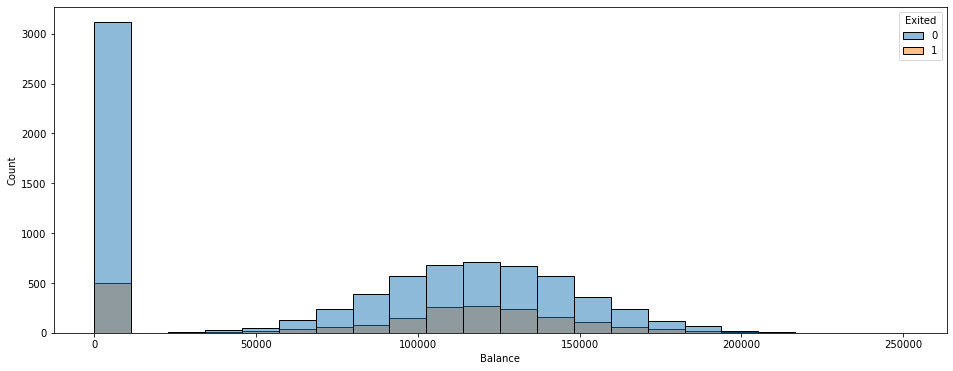

In [302]:
pt.figure(figsize=(16,6))
sb.histplot(data=df,x='Balance',hue='Exited')

### range of 50000 balance the churned out peoples are more.

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

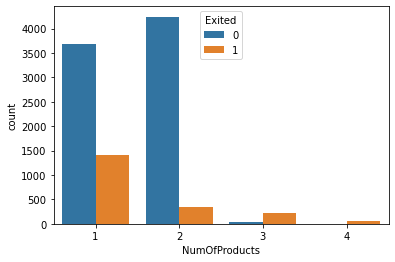

In [303]:
sb.countplot(data=df,x='NumOfProducts',hue='Exited')

### who are purchasing number of products is 1 are churned out more according to others

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

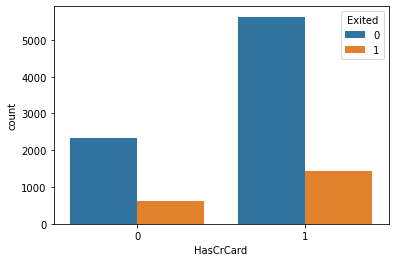

In [304]:
sb.countplot(data=df,x='HasCrCard',hue='Exited')

### who has their own credit card has churned out more

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

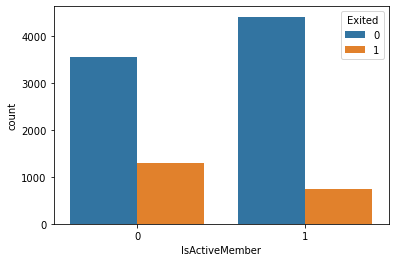

In [305]:
sb.countplot(data=df,x='IsActiveMember',hue='Exited')

### non active member is churned out more

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

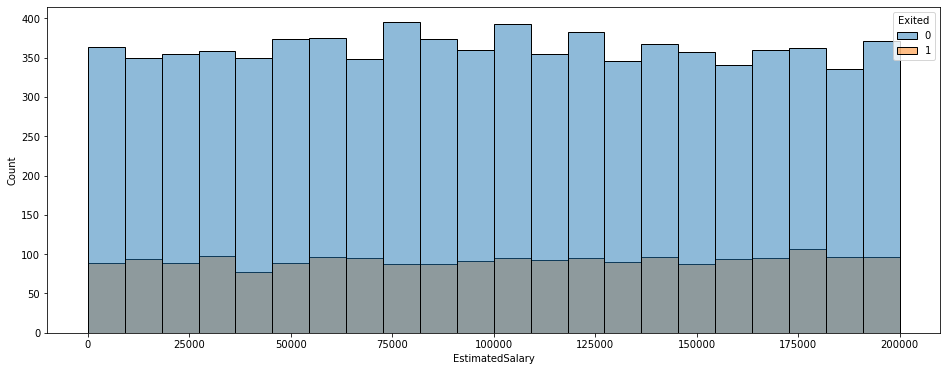

In [306]:
pt.figure(figsize=(16,6))
sb.histplot(data=df,x='EstimatedSalary',hue='Exited')

### we cant conclude clearly to see this graph who is churned out or not

In [307]:
df1=df.copy()
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,france,Female,42,2,0.00,1,1,1,101348.88,1
1,608,spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,france,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,france,Female,39,1,0.00,2,0,0,93826.63,0
4,850,spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,france,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,france,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,france,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,germany,Male,42,3,75075.31,2,1,0,92888.52,1


# change datatype of object column to category

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [309]:
df['Geography']=df['Geography'].astype('category')
df['Gender']=df['Gender'].astype('category')

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


# Label Encoder

In [311]:
from sklearn.preprocessing import LabelEncoder

In [312]:
le=LabelEncoder()

In [313]:
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [315]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [316]:
df2=df.iloc[:,10:11]
df2

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


# checking correlation:-

In [317]:
corr=df.corr()

<AxesSubplot:>

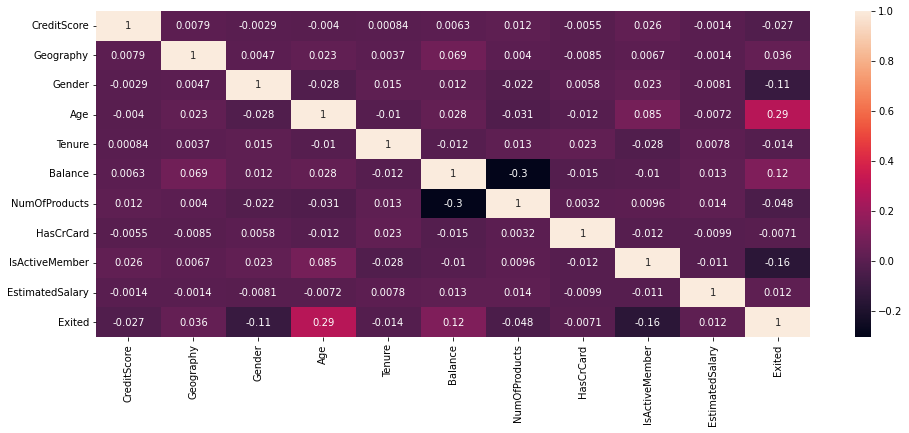

In [318]:
pt.figure(figsize=(16,6))
sb.heatmap(corr,annot=True)

# Age is highly correlated with exited and the second highest balance is correlated 
# and we can see Active member is negative correlated with Exited

# feature scaling

In [319]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [320]:
# defining method to perform data scaling operation based on the type of scaling 
def feature_scale(scale):
  numerics=['int16','int32','int64','float16','float32','float64']
  new_df=df.select_dtypes(include=numerics)
  if scale == 'minmax':
    scaler= MinMaxScaler()
  else:
    scaler=StandardScaler()
  df_scaled=pd.DataFrame(scaler.fit_transform(new_df.to_numpy()),columns=new_df.columns)
  return df_scaled

In [321]:
# scaling data using minmax scaling process
scale='minmax'
scaled_df=feature_scale(scale)
scaled_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [322]:
scaled_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0
9996,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0
9997,0.718,0.0,0.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0
9998,0.844,0.5,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0


In [323]:
scaled_df.drop(columns='Exited',inplace=True)

In [324]:
scaled_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400
...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341
9996,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490
9997,0.718,0.0,0.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390
9998,0.844,0.5,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429


In [325]:
scaled_df['Exited']=df2['Exited']

In [326]:
scaled_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0
9996,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0
9997,0.718,0.0,0.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1
9998,0.844,0.5,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1


In [327]:
x=scaled_df.iloc[:,:10]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400
...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341
9996,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490
9997,0.718,0.0,0.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390
9998,0.844,0.5,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429


In [328]:
y=scaled_df.iloc[:,10:11]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


# train test split or model traning

In [329]:
from sklearn.model_selection import train_test_split

In [330]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [331]:
x_train.shape

(7000, 10)

In [332]:
y_train.shape

(7000, 1)

In [333]:
x_test.shape

(3000, 10)

In [334]:
y_test.shape

(3000, 1)

# >>>>>***********logistic regression***********

In [335]:
from sklearn.linear_model import LogisticRegression

In [336]:
lg=LogisticRegression()

In [337]:
lg

LogisticRegression()

In [338]:
model1=lg.fit(x_train,y_train)
model1

LogisticRegression()

In [339]:
train_accuracy=round(model1.score(x_train,y_train)*100,2)

In [340]:
train_accuracy        # train accuracy of the model

81.31

In [341]:
y_pred=model1.predict(x_test)   # predicted value

In [342]:
y_pred                            # predicted outcomes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# # slope and intercept

In [343]:
model1.intercept_              # intercept 

array([-2.57618907])

In [344]:
model1.coef_[0]                 # coefficient

array([-2.92279190e-01,  1.96232611e-01, -5.55658814e-01,  5.16519678e+00,
       -8.70120146e-02,  1.31280811e+00, -5.15673904e-03, -1.28606229e-02,
       -1.07673933e+00,  1.95510040e-01])

In [345]:
# indicates the valueof the slope of each parameter
coeff_df=pd.DataFrame(x_train.columns.delete(0))
coeff_df.columns=['Feature']
coeff_df['Slope']=pd.Series(model1.coef_[0])
coeff_df.sort_values(by='Slope',ascending=False)

,Feature,Slope
3,Tenure,5.165197
5,NumOfProducts,1.312808
1,Gender,0.196233
6,HasCrCard,-0.005157
7,IsActiveMember,-0.012861
4,Balance,-0.087012
0,Geography,-0.292279
2,Age,-0.555659
8,EstimatedSalary,-1.076739


# **********confusion matrix*************

In [346]:
from sklearn.metrics import confusion_matrix

In [347]:
print(confusion_matrix(y_test,y_pred))

[[2310   70]
 [ 537   83]]


# importing scoring libraries

In [348]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [349]:
print('accuracy: ',accuracy_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred))


accuracy:  0.7976666666666666
Recall:  0.1338709677419355
f1_score:  0.2147477360931436
precision:  0.5424836601307189


In [350]:
score1=round(accuracy_score(y_test,y_pred),3)
score1

0.798

In [351]:
kf=KFold(n_splits=5)
score=cross_val_score(lg,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(round(score.mean(),2)))

Cross Validation Scores are [0.804  0.799  0.8055 0.8225 0.8095]
Average Cross Validation score :0.81


# accuray score of multiple feature is 81%

# *****************ROC(AUC)

In [352]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,model1.predict_proba(x_test)[:,1])
roc

0.7465973163458931

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.747


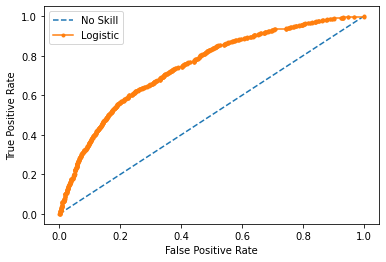

In [353]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model1.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)   # no skill line
lr_auc = roc_auc_score(y_test, lr_probs)      # logistic regression line
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pt.xlabel('False Positive Rate')
pt.ylabel('True Positive Rate')
# show the legend
pt.legend()
# show the plot
pt.show()

### conclusion:- here we can see our logistic regression value is near to the 1 so we can say it a good model.

# Logistic regression with highly correlated columns

In [354]:
scaled_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0


In [355]:
corr1=scaled_df.corr()
corr1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:>

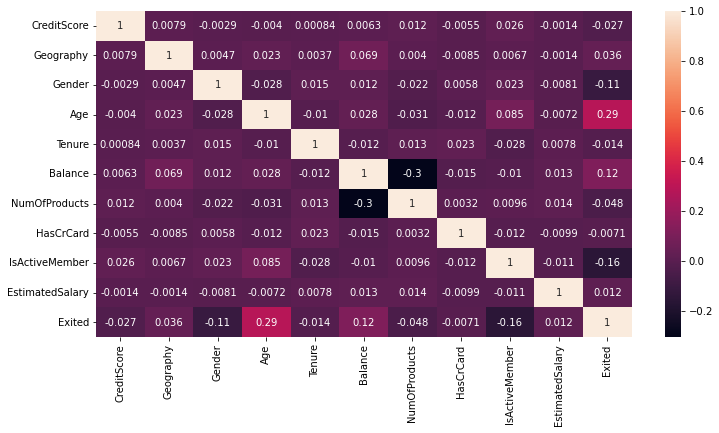

In [356]:
pt.figure(figsize=(12,6))
sb.heatmap(corr1,annot=True)

### age,Balance and the active member is negative correlated

In [357]:
x1=scaled_df[['Age','Balance']]
y1=scaled_df[['Exited']]

In [358]:
x1

,Age,Balance
0,0.324324,0.000000
1,0.310811,0.334031
2,0.324324,0.636357
3,0.283784,0.000000
4,0.337838,0.500246
...,...,...
9995,0.283784,0.000000
9996,0.229730,0.228657
9997,0.243243,0.000000
9998,0.324324,0.299226


In [359]:
y1

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [360]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=10)

In [361]:
x1_train.shape

(7000, 2)

In [362]:
x1_test.shape

(3000, 2)

In [363]:
lg=LogisticRegression()

In [364]:
lg

LogisticRegression()

In [365]:
model2=lg.fit(x1_train,y1_train)
model2

LogisticRegression()

In [366]:
train_accuracy2=round(model2.score(x1_train,y1_train)*100,2)

In [367]:
train_accuracy2

78.17

In [368]:
y_pred2=model2.predict(x1_test) 

In [369]:
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# slope and intercept

In [370]:
model2.intercept_

array([-3.17652053])

In [371]:
model2.coef_[0]

array([4.49940758, 1.28211443])

## *********confusion matrix****

In [372]:
from sklearn.metrics import confusion_matrix

In [373]:
print(confusion_matrix(y1_test,y_pred2))

[[2304   76]
 [ 595   25]]


# scores

In [374]:
print('accuracy: ',accuracy_score(y1_test,y_pred2))
print('Recall: ',recall_score(y1_test,y_pred2))
print('f1_score: ',f1_score(y1_test,y_pred2))
print('precision: ',precision_score(y1_test,y_pred2))


accuracy:  0.7763333333333333
Recall:  0.04032258064516129
f1_score:  0.06934812760055478
precision:  0.24752475247524752


In [375]:
score2=round(accuracy_score(y1_test,y_pred2),2)
score2

0.78

In [376]:
kf=KFold(n_splits=5)
score=cross_val_score(lg,x1,y1,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(round(score.mean(),2)))

Cross Validation Scores are [0.776  0.767  0.781  0.786  0.7865]
Average Cross Validation score :0.78


# accuracy score of two features is 78%

In [377]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y1_test,model2.predict_proba(x1_test)[:,1])
roc

0.7305865410680401

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.731


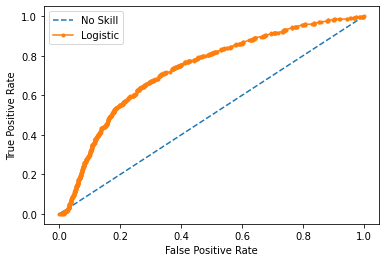

In [378]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y1_test))]
# predict probabilities
lr_probs = model2.predict_proba(x1_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y1_test, ns_probs)   # no skill line
lr_auc = roc_auc_score(y1_test, lr_probs)      # logistic regression line
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y1_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y1_test, lr_probs)
# plot the roc curve for the model
pt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pt.xlabel('False Positive Rate')
pt.ylabel('True Positive Rate')
# show the legend
pt.legend()
# show the plot
pt.show()

# closer to 1 so we can say it is a good model

# ***************** DECISION TREE CLASSIFIER****************

In [379]:
from sklearn.tree import DecisionTreeClassifier

In [453]:
dc=DecisionTreeClassifier(max_depth=2)

In [454]:
x_train.shape

(7000, 10)

In [455]:
y_train.shape

(7000, 1)

In [456]:
model3=dc.fit(x_train,y_train)
model3

DecisionTreeClassifier(max_depth=2)

In [457]:
train_accuracy3=round(model3.score(x_train,y_train)*100,2)
train_accuracy3

83.01

In [458]:
y_pred3=dc.predict(x_test)

In [459]:
y_pred3

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [460]:
from sklearn.metrics import accuracy_score

In [461]:
print('accuracy score',round(accuracy_score(y_test,y_pred3),2))

accuracy score 0.83


In [462]:
score3=round(accuracy_score(y_test,y_pred3),2)
score3

0.83

In [463]:
print('accuracy: ',round(accuracy_score(y_test,y_pred3),2))
print('Recall: ',round(recall_score(y_test,y_pred3),2))
print('f1_score: ',round(f1_score(y_test,y_pred3),2))
print('precision: ',round(precision_score(y_test,y_pred3),2))

accuracy:  0.83
Recall:  0.43
f1_score:  0.51
precision:  0.62


In [464]:
kf=KFold(n_splits=5)
score=cross_val_score(dc,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.834  0.824  0.8345 0.837  0.8175]
Average Cross Validation score :0.8293999999999999


# accuracy of decision Tree classifier without any hyper parameter is 83%

## with hyper parameter

In [392]:
dt=DecisionTreeClassifier(max_depth=5,max_features='auto',random_state=10)

In [393]:
x_train.shape

(7000, 10)

In [394]:
y_train.shape

(7000, 1)

In [395]:
model4=dt.fit(x_train,y_train)
model4

DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=10)

In [466]:
train_accuracy4=round(model4.score(x_train,y_train)*100,2)
train_accuracy4

82.56

In [467]:
y_pred4=dt.predict(x_test)

In [468]:
y_pred4

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [469]:
print('accuracy score',(accuracy_score(y_test,y_pred4)))

accuracy score 0.8023333333333333


In [470]:
score4=round(accuracy_score(y_test,y_pred4),3)
score4

0.802

In [471]:
print('accuracy: ',round(accuracy_score(y_test,y_pred4),3))
print('Recall: ',round(recall_score(y_test,y_pred4),2))
print('f1_score: ',round(f1_score(y_test,y_pred4),2))
print('precision: ',round(precision_score(y_test,y_pred4),2))

accuracy:  0.802
Recall:  0.29
f1_score:  0.37
precision:  0.54


In [472]:
kf=KFold(n_splits=5)
score=cross_val_score(dt,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.831  0.815  0.8305 0.817  0.815 ]
Average Cross Validation score :0.8216999999999999


### it is increasing with 1 % after using hyper parameter now it is 82%

# **************Naive bayes algorithm*************

In [402]:
from sklearn.naive_bayes import GaussianNB

In [403]:
clf=GaussianNB()

In [404]:
model5=clf.fit(x_train,y_train)
model5

GaussianNB()

In [473]:
train_accurac5=round(model5.score(x_train,y_train)*100,2)

In [474]:
train_accurac5

83.4

In [475]:
y_pred5=clf.predict(x_test)
y_pred5

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## confusion matrix

In [476]:
confusion_matrix(y_test,y_pred5)

array([[2319,   61],
       [ 487,  133]], dtype=int64)

In [477]:
accuracy_score(y_test,y_pred5)

0.8173333333333334

In [478]:
score5=round(accuracy_score(y_test,y_pred5),2)
score5

0.82

In [479]:
print('accuracy: ',round(accuracy_score(y_test,y_pred5),2))
print('Recall: ',round(recall_score(y_test,y_pred5),2))
print('f1_score: ',round(f1_score(y_test,y_pred5),2))
print('precision: ',round(precision_score(y_test,y_pred5),2))

accuracy:  0.82
Recall:  0.21
f1_score:  0.33
precision:  0.69


In [480]:
kf=KFold(n_splits=5)
score=cross_val_score(clf,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(round(score.mean(),2)))

Cross Validation Scores are [0.8245 0.8185 0.827  0.8415 0.83  ]
Average Cross Validation score :0.83


## accuracy score of naive bayes is 83 %

# *************k-neighbours classifier************

In [411]:
from sklearn.neighbors import KNeighborsClassifier

In [412]:
knn=KNeighborsClassifier()

In [413]:
model6=knn.fit(x_train,y_train)
model6

KNeighborsClassifier()

In [481]:
train_accuracy6=round(model6.score(x_train,y_train)*100,2)
train_accuracy6

86.4

In [482]:
y_pred6=knn.predict(x_test)
y_pred6

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [483]:
confusion_matrix(y_test,y_pred6)

array([[2254,  126],
       [ 449,  171]], dtype=int64)

In [484]:
accuracy_score(y_test,y_pred6)

0.8083333333333333

In [485]:
print('accuracy: ',round(accuracy_score(y_test,y_pred6),2))
print('Recall: ',round(recall_score(y_test,y_pred6),2))
print('f1_score: ',round(f1_score(y_test,y_pred6),2))
print('precision: ',round(precision_score(y_test,y_pred6),2))

accuracy:  0.81
Recall:  0.28
f1_score:  0.37
precision:  0.58


In [486]:
score6=round(accuracy_score(y_test,y_pred6),2)
score6

0.81

In [487]:
kf=KFold(n_splits=5)
score=cross_val_score(knn,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(round(score.mean(),2)))

Cross Validation Scores are [0.805  0.8175 0.8105 0.8245 0.822 ]
Average Cross Validation score :0.82


# >>>>>>>>>>>>accuracy score of  k_kneighbours is 82 % 

# *****************bagging techniques Random forest classifier*************

In [420]:
from sklearn.ensemble import RandomForestClassifier

In [495]:
rc=RandomForestClassifier(n_estimators=2)   #it is overfitted with default parameter so i have taken  n_estimator=2

In [496]:
model7=rc.fit(x_train,y_train)
model7

RandomForestClassifier(n_estimators=2)

In [497]:
train_accuracy7=round(model7.score(x_train,y_train)*100,2)
train_accuracy7

92.74

In [498]:
y_pred7=rc.predict(x_test)
y_pred7

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [499]:
confusion_matrix(y_test,y_pred7)

array([[2285,   95],
       [ 430,  190]], dtype=int64)

In [500]:
score7=round(accuracy_score(y_test,y_pred7),2)

In [501]:
print('accuracy: ',round(accuracy_score(y_test,y_pred7),2))
print('Recall: ',round(recall_score(y_test,y_pred7),2))
print('f1_score: ',round(f1_score(y_test,y_pred7),2))
print('precision: ',round(precision_score(y_test,y_pred7),2))

accuracy:  0.82
Recall:  0.31
f1_score:  0.42
precision:  0.67


In [502]:
score7

0.82

In [503]:
kf=KFold(n_splits=5)
score=cross_val_score(rc,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(round(score.mean(),2)))

Cross Validation Scores are [0.8235 0.823  0.833  0.834  0.832 ]
Average Cross Validation score :0.83


# ************adaboost***************

In [504]:
from sklearn.ensemble import AdaBoostClassifier

In [505]:
ac=AdaBoostClassifier()

In [506]:
model8=ac.fit(x_train,y_train)
model8

AdaBoostClassifier()

In [507]:
train_accuracy8=round(model8.score(x_train,y_train)*100,2)
train_accuracy8

86.07

In [508]:
y_pred8=ac.predict(x_test)
y_pred8

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [509]:
confusion_matrix(y_test,y_pred8)

array([[2259,  121],
       [ 326,  294]], dtype=int64)

In [510]:
score8=round(accuracy_score(y_test,y_pred8),2)

In [511]:
print('accuracy: ',round(accuracy_score(y_test,y_pred8),2))
print('Recall: ',round(recall_score(y_test,y_pred8),2))
print('f1_score: ',round(f1_score(y_test,y_pred8),2))
print('precision: ',round(precision_score(y_test,y_pred8),2))

accuracy:  0.85
Recall:  0.47
f1_score:  0.57
precision:  0.71


In [512]:
score8

0.85

In [513]:
kf=KFold(n_splits=5)
score=cross_val_score(ac,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(round(score.mean(),2)))

Cross Validation Scores are [0.8545 0.8565 0.858  0.864  0.854 ]
Average Cross Validation score :0.86


# ************** bagging classifier ***********

In [514]:
from sklearn.ensemble import BaggingClassifier

In [518]:
bc=BaggingClassifier(n_estimators=2)

In [519]:
model9=bc.fit(x_train,y_train)
model9

BaggingClassifier(n_estimators=2)

In [520]:
train_accuracy9=round(model9.score(x_train,y_train)*100,2)
train_accuracy9

93.14

In [521]:
y_pred9=bc.predict(x_test)
y_pred9

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [522]:
confusion_matrix(y_test,y_pred9)

array([[2277,  103],
       [ 421,  199]], dtype=int64)

In [523]:
score9=round(accuracy_score(y_test,y_pred9),2)

In [524]:
print('accuracy: ',round(accuracy_score(y_test,y_pred9),2))
print('Recall: ',round(recall_score(y_test,y_pred9),2))
print('f1_score: ',round(f1_score(y_test,y_pred9),2))
print('precision: ',round(precision_score(y_test,y_pred9),2))

accuracy:  0.83
Recall:  0.32
f1_score:  0.43
precision:  0.66


In [525]:
score9

0.83

In [526]:
kf=KFold(n_splits=5)
score=cross_val_score(bc,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(round(score.mean(),2)))

Cross Validation Scores are [0.827 0.829 0.828 0.836 0.831]
Average Cross Validation score :0.83


In [527]:
tx=pd.DataFrame()

In [528]:
tx['models']=['Logistic_rgr','Logistic_corr','Decision_tree','DEcision_treeHyper','Naive_bayes','KNN','Random_forest','Adaboost','Bagging_classifier']

In [529]:
tx

,models
0,Logistic_rgr
1,Logistic_corr
2,Decision_tree
3,DEcision_treeHyper
4,Naive_bayes
5,KNN
6,Random_forest
7,Adaboost
8,Bagging_classifier


In [530]:
tx['Score']=[81,78,79,82,83,82,86,86,83]

In [531]:
tx

,models,Score
0,Logistic_rgr,81
1,Logistic_corr,78
2,Decision_tree,79
3,DEcision_treeHyper,82
4,Naive_bayes,83
5,KNN,82
6,Random_forest,86
7,Adaboost,86
8,Bagging_classifier,83


In [532]:
tx['training_accuracy']=[81.31,78.17,83.01,82.56,83.4,86.4,92.74,86.07,93.14]

In [533]:
tx

,models,Score,training_accuracy
0,Logistic_rgr,81,81.31
1,Logistic_corr,78,78.17
2,Decision_tree,79,83.01
3,DEcision_treeHyper,82,82.56
4,Naive_bayes,83,83.40
5,KNN,82,86.40
6,Random_forest,86,92.74
7,Adaboost,86,86.07
8,Bagging_classifier,83,93.14


# conclusion:- random Forest,adaboost is best model